# Basic Calculus

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Differentiation

The basic idea of [differentiation](https://en.wikipedia.org/wiki/Differential_calculus) is that we take the difference of a function over very small distances. That's seriously all it is.

$$\begin{align}
\frac{df}{dx} &= \lim_{\Delta x \rightarrow 0} \frac{f(x+\Delta x) - f(x)}{\Delta x}
\end{align}$$

Numerically, we just approximate it like,

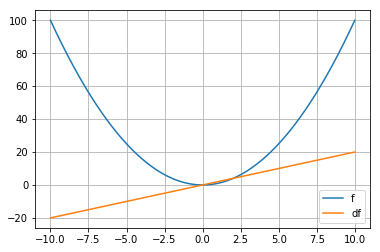

In [3]:
def f(x):
    return x**2

def df(x, dx=1e-3):
    return (f(x + dx) - f(x))/dx

x = np.arange(-10, 10, 1e-3)

plt.plot(x, f(x))
plt.plot(x, df(x))
plt.legend(['f', 'df'])
plt.grid()
plt.show()

**Problem:** For the above plot, we notice that $ f'(x) = \frac{df}{dx} $ is a straight line. Compute the [slope](https://en.wikipedia.org/wiki/Slope) and intercept of that line numerically.

Numpy has a useful function [`np.polyval`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyval.html) that computes the value of any polynomial. For example, we can plot polynomials like,

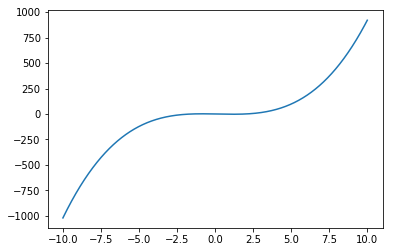

In [28]:
x = np.arange(-10, 10, 1e-3)
f = np.polyval([1.0, -0.5, -3.0, 0.25], x)
plt.plot(x, f)
plt.show()

where the list `[1.0, -0.5, -3.0, 0.25]` are the polynomial coefficients.

**Problem:** Write a function that given an arbitrary set of polynomial coefficients, it computes the derivative of the polynomial numerically. Be sure to compute the differences between each pair of points and don't assume a constant $ \Delta x $.

In [29]:
def polydiff(coeffs, x):
    # Replace the next line with your own code
    y = np.polyval(coeffs, x)
    a = []
    for i in range(len(x)-1):
        a.append((y[i+1]-y[i])/(x[i+1]-x[i]))
    a.append(a[-1])
    return a

You can verify by comparing it to our simple example above

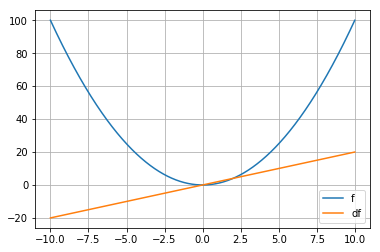

In [30]:
coeffs = [1.0, 0.0, 0.0]
x = np.arange(-10, 10, 1e-3)
plt.plot(x, np.polyval(coeffs, x))
plt.plot(x, polydiff(coeffs, x))
plt.legend(['f', 'df'])
plt.grid()
plt.show()

Numpy also has [`np.polyval`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) which fits a polynomial to your data. We can see this give us back out coefficients.

In [31]:
coeffs = [1, 3, 5]
x = np.arange(-10, 10, 1e-3)
f = np.polyval(coeffs, x)
print(np.polyfit(x, f, deg=len(coeffs)-1))

[1. 3. 5.]


**Problem:** Using the polydiff I wrote below (just because it will run faster), write a function that computes the coefficients of the polynomial for the derivative.

In [37]:
def polydiff(coeffs, x):
    return np.gradient(np.polyval(coeffs, x))/np.gradient(x)

def diff_coeffs(coeffs):
    """
    Return the coefficients for the derivative polynomial
    """
    return np.polyfit(x, polydiff(coeffs, x), deg = len(coeffs)-1)


In [38]:
coeffs = [1, 3, 5]
x = np.arange(-10, 10, 1e-3)
f = np.polyval(coeffs, x)
print(np.polyfit(x, f, deg=len(coeffs)-1))
print(diff_coeffs(coeffs))

[1. 3. 5.]
[5.66227217e-16 1.99999997e+00 3.00000000e+00]
